In [1]:
nifty50_tickers = [
    "ADANIENT", "ADANIPORTS", "ASIANPAINT", "AXISBANK", "BAJAJ-AUTO", 
    "BAJFINANCE", "BAJAJFINSV", "BHARTIARTL", "BPCL", "BRITANNIA",
    "CIPLA", "COALINDIA", "DIVISLAB", "DRREDDY", "EICHERMOT", 
    "GRASIM", "HCLTECH", "HDFC", "HDFCBANK", "HDFCLIFE",
    "HEROMOTOCO", "HINDALCO", "HINDUNILVR", "ICICIBANK", "INDUSINDBK", 
    "INFY", "ITC", "JSWSTEEL", "KOTAKBANK", "LT", 
    "M&M", "MARUTI", "NESTLEIND", "NTPC", "ONGC", 
    "POWERGRID", "RELIANCE", "SBILIFE", "SBIN", "SUNPHARMA", 
    "TATACONSUM", "TATAMOTORS", "TATASTEEL", "TCS", "TECHM", 
    "TITAN", "ULTRACEMCO", "UPL", "WIPRO"
]

In [2]:
import yfinance as yf

dataframes = {}
for i in nifty50_tickers:
    data = yf.download(i+'.NS', start='2000-01-01', end='2024-10-10')
    dataframes[i] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

c:\Anaconda_program_files\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
ticker = input("Enter stock ticker: ")

In [7]:
df = dataframes[str(ticker)]

Text(0.5, 1.0, 'NSE:BRITANNIA')

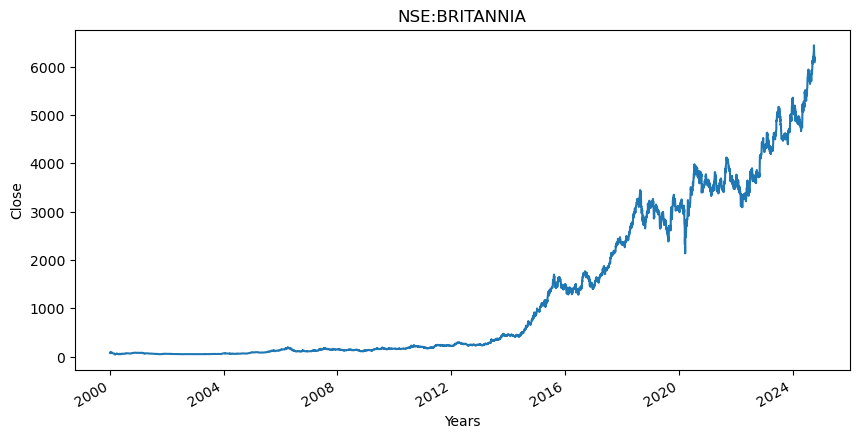

In [8]:
plt.figure(figsize = (10,5))
df["Close"].plot()
plt.ylabel("Close")
plt.xlabel("Years")
plt.title("NSE:" + str(ticker))

In [9]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.ylabel(column_name)
    plt.xlabel("Years")
    plt.title("NSE:" + str(ticker))

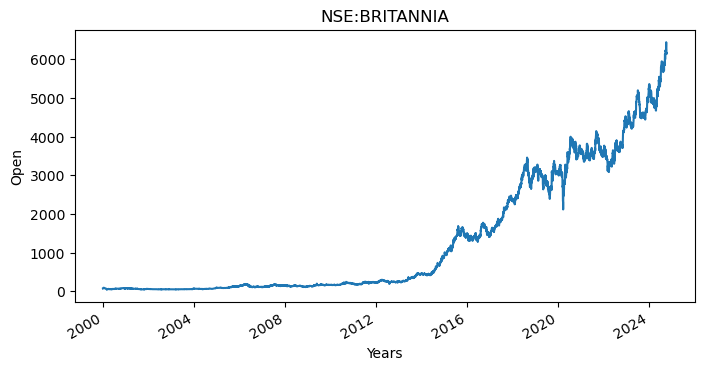

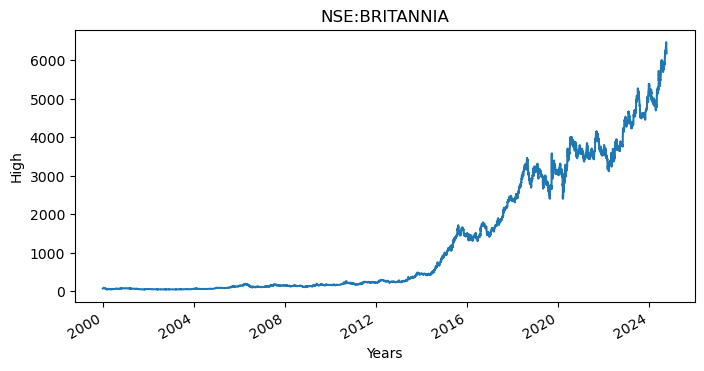

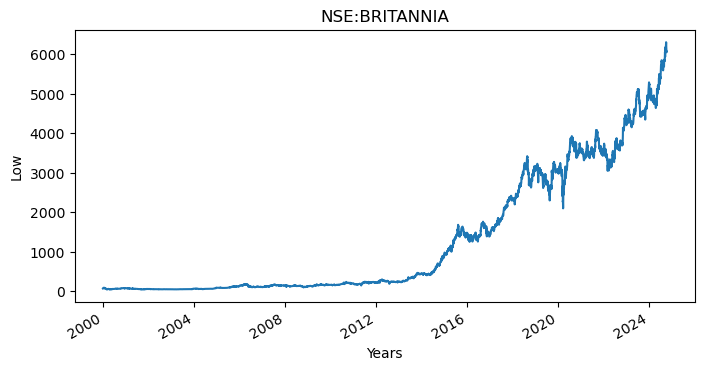

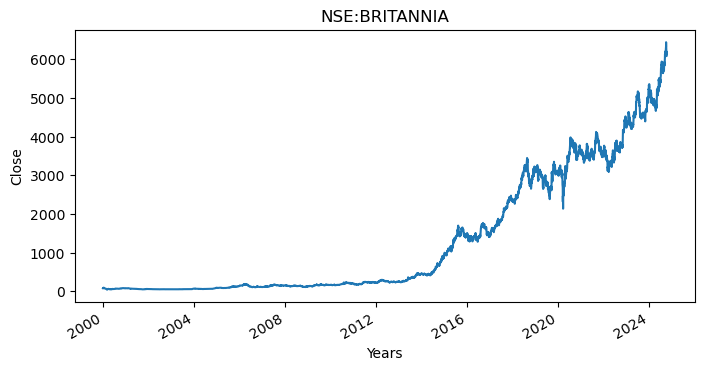

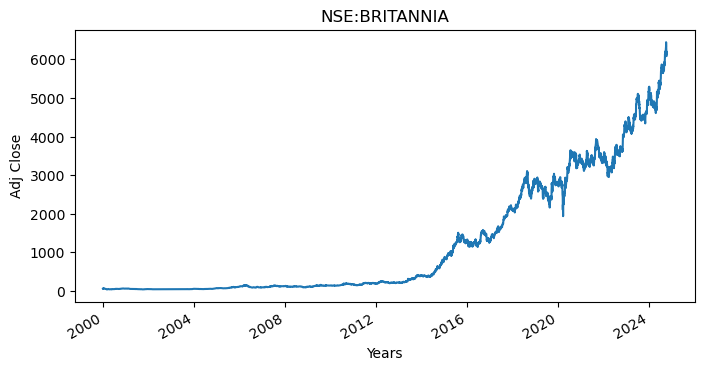

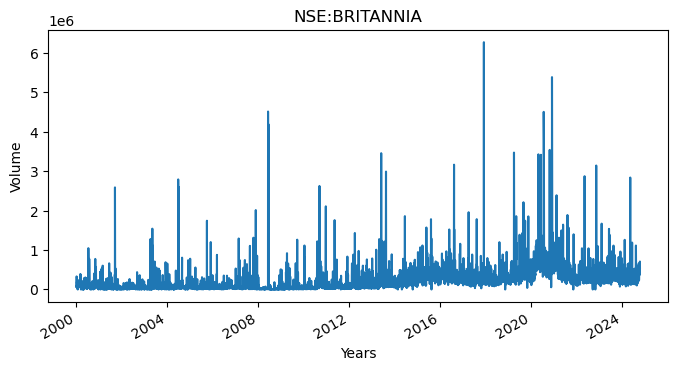

In [10]:
for column in df.columns:
    plot_graph((8,4), df[column], column )

In [11]:
df["MA_250"] = df['Close'].rolling(250).mean()
df["MA_100"] = df['Close'].rolling(100).mean()

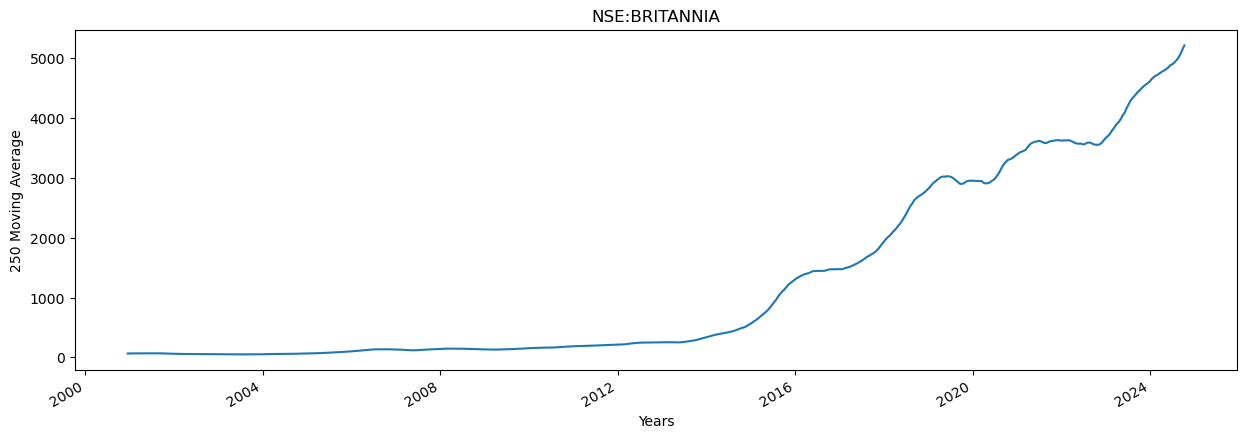

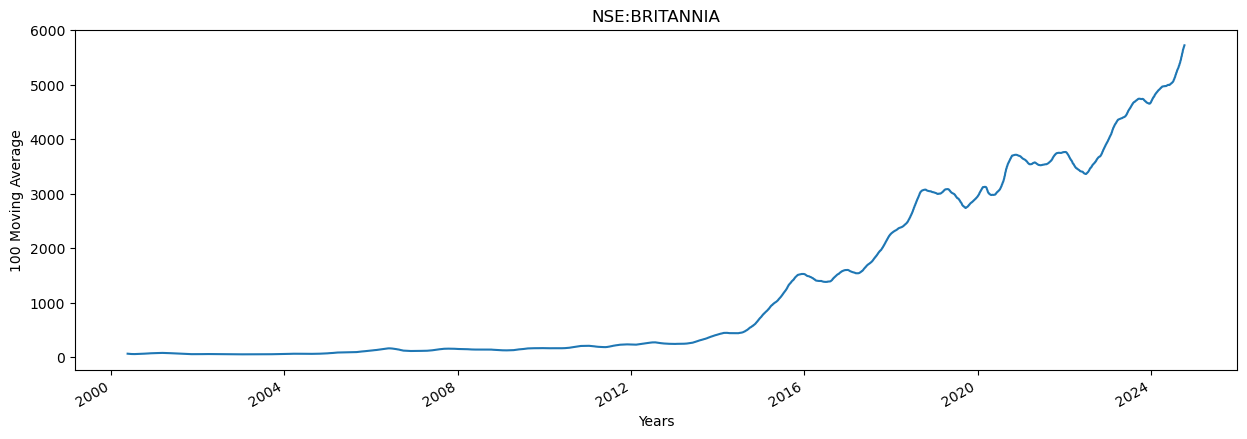

In [12]:
plot_graph((15,5), df['MA_250'], "250 Moving Average")
plot_graph((15,5), df['MA_100'], "100 Moving Average")

<Figure size 640x480 with 0 Axes>

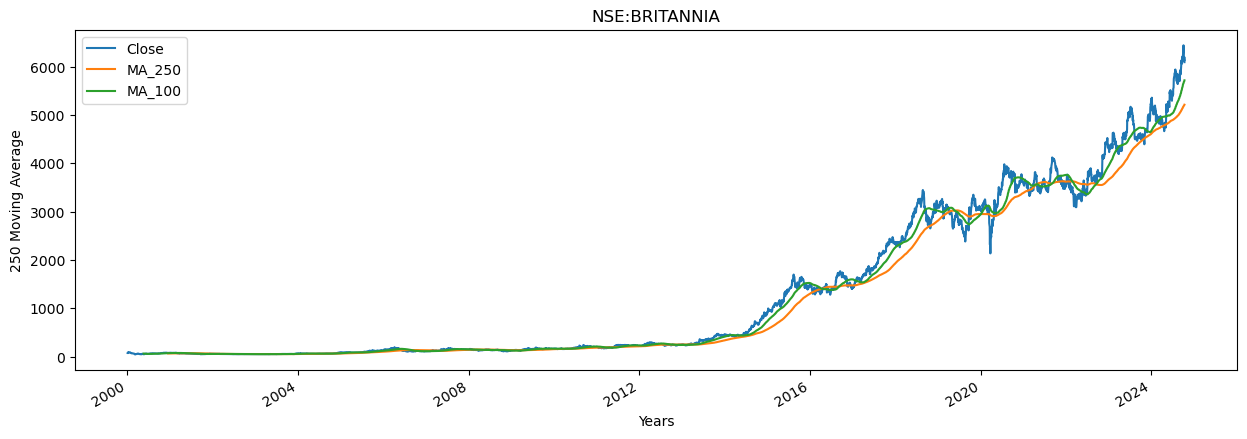

In [13]:
plot_graph((15,5), df[['Close','MA_250', 'MA_100']], "250 Moving Average")

In [14]:
df["Percentage_Change"] = df['Close'].pct_change()
df[["Close", "Percentage_Change"]].head(10)

,Close,Percentage_Change
Date,,
2000-01-03,75.690002,NaN
2000-01-04,75.455002,-0.003105
2000-01-05,73.529999,-0.025512
2000-01-06,78.565002,0.068476
2000-01-07,84.849998,0.079997
2000-01-10,91.220001,0.075074
2000-01-11,85.375000,-0.064076
2000-01-12,88.269997,0.033909
2000-01-13,88.139999,-0.001473


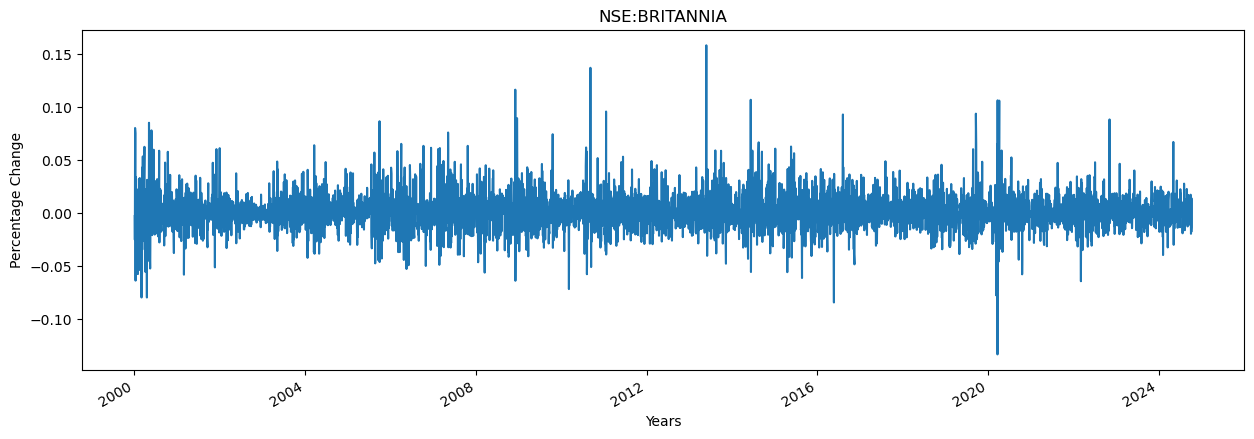

In [15]:
plot_graph((15,5), df['Percentage_Change'], "Percentage Change")

In [16]:
Close_price = df[["Close"]]

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)

scaled_data

array([[0.00449359],
       [0.00445687],
       [0.00415604],
       ...,
       [0.94909452],
       [0.96223698],
       [0.94549249]])

In [18]:
len(scaled_data)

6183

In [19]:
X_data = []
y_data = []

for i in range(100, len(scaled_data)):
    X_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

X_data, y_data = np.array(X_data), np.array(y_data)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your entire features and labels datasets
# First, split into training + validation and test datasets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Now split the training + validation dataset into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Now you have:
# X_train and y_train for training the model
# X_val and y_val for validating the model
# X_test and y_test for testing the model after training

In [22]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

# Assuming X_train, y_train, X_val, and y_val are your training and validation data and labels
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # For regression (stock price prediction)
])

# Compile the model using RMSProp
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Fit the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Predictions
predictions = model.predict(X_test)

C:\Users\mohammad\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5828 - val_loss: 0.0367
Epoch 2/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0534 - val_loss: 0.0260
Epoch 3/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0221 - val_loss: 0.0469
Epoch 4/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0183 - val_loss: 0.0224
Epoch 5/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133 - val_loss: 0.0045
Epoch 6/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0110 - val_loss: 0.0135
Epoch 7/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0089 - val_loss: 0.0033
Epoch 8/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090 - val_loss: 0.0253
Epoch 9/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0108
Epoch 10/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0076 - val_loss: 0.0133
Epoch 11/200
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - val_loss: 0.0017
Epoch 12/200
244/244 ━━━━━━━━━━━━━━━━━━━━

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,748 (186.52 KB)

 Trainable params: 23,681 (92.50 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 23,683 (92.52 KB)

In [24]:
# Predictions
predictions = model.predict(X_test)
rmse = np.sqrt(np.mean((y_test - predictions.flatten())**2))
print(f'RMSE: {rmse}')

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.3377289261953257


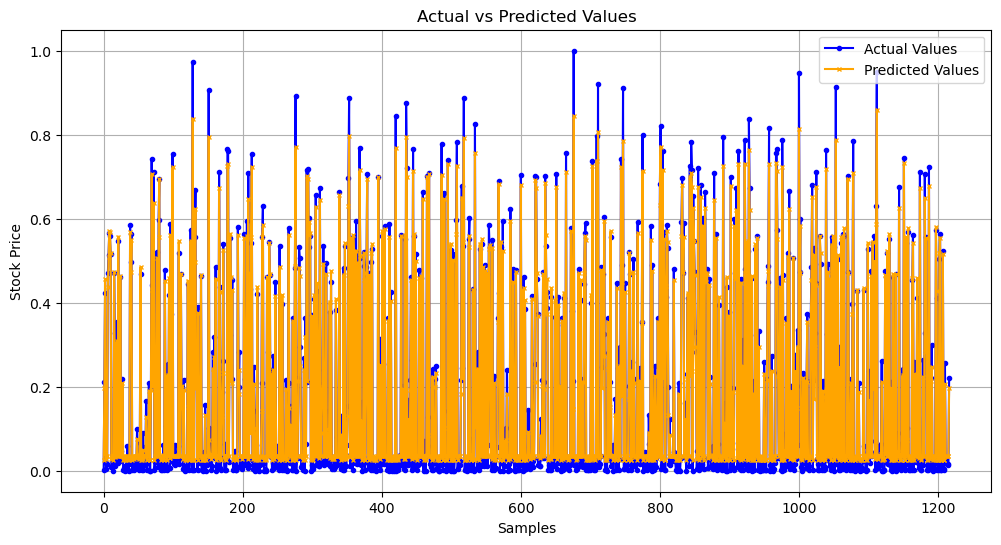

In [25]:
# Assuming predictions and y_test are defined
# Flatten them if they're not already in 1D
y_test = y_test.flatten()  # Make sure this is a 1D array
predictions = predictions.flatten()  # Make sure this is a 1D array

# Plotting
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(y_test, label='Actual Values', color='blue', linestyle='-', marker='o', markersize=3)

# Plotting predicted values
plt.plot(predictions, label='Predicted Values', color='orange', linestyle='-', marker='x', markersize=3)

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

In [26]:
print(i)

6182


In [27]:
model.save("Latest_stock_price_model_" + ticker + ".keras")